Yt = Yt-1 + ϵt + θϵt-1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

In [ ]:
raw_csv_data = pd.read_csv("Book1.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace = True)
df_comp = df_comp.asfreq ('b')
df_comp = df_comp.fillna(method= 'ffill')

In [ ]:
df_comp['market_value'] = df_comp.ftse

In [ ]:
df_comp['market_value'] = df_comp.spx

In [ ]:
del df_comp['spx']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [ ]:
df_comp['returns'] = df_comp.market_value.pct_change(1)*100

ARMA(1,1)

In [ ]:
model_ret_ar_1_ma_1 = ARIMA(df_comp.returns[1:], order =(1,0,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -9658.301
Date:                Wed, 28 Jun 2023   AIC                          19324.603
Time:                        17:27:14   BIC                          19351.581
Sample:                    01-10-1994   HQIC                         19333.950
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0351      0.013      2.751      0.006       0.010       0.060
ar.L1          0.6371      0.046     13.976      0.000       0.548       0.726
ma.L1         -0.7033      0.041    -17.065      0.000      -0.784      -0.622
sigma2         1.2712      0.010    125.923      0.000       1.251       1.291
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):             20263.70
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_1 = ARIMA(df_comp.returns[1:], order = (1,0,0))
model_ret_ma_1 = ARIMA(df_comp.returns[1:], order = (0,0,1))


In [ ]:
def LLR_test(mod_1,mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p
print("\nLLR test p-value = " + str(LLR_test(model_ret_ar_1, model_ret_ma_1)))


LLR test p-value = 0.121


In [ ]:
print("\nARMA vs AR ", LLR_test(model_ret_ar_1, model_ret_ar_1_ma_1))
print("\nARMA vs MA ", LLR_test(model_ret_ar_1, model_ret_ar_1_ma_1))


ARMA vs AR  0.0

ARMA vs MA  0.0


Higher-Lag ARMA Models


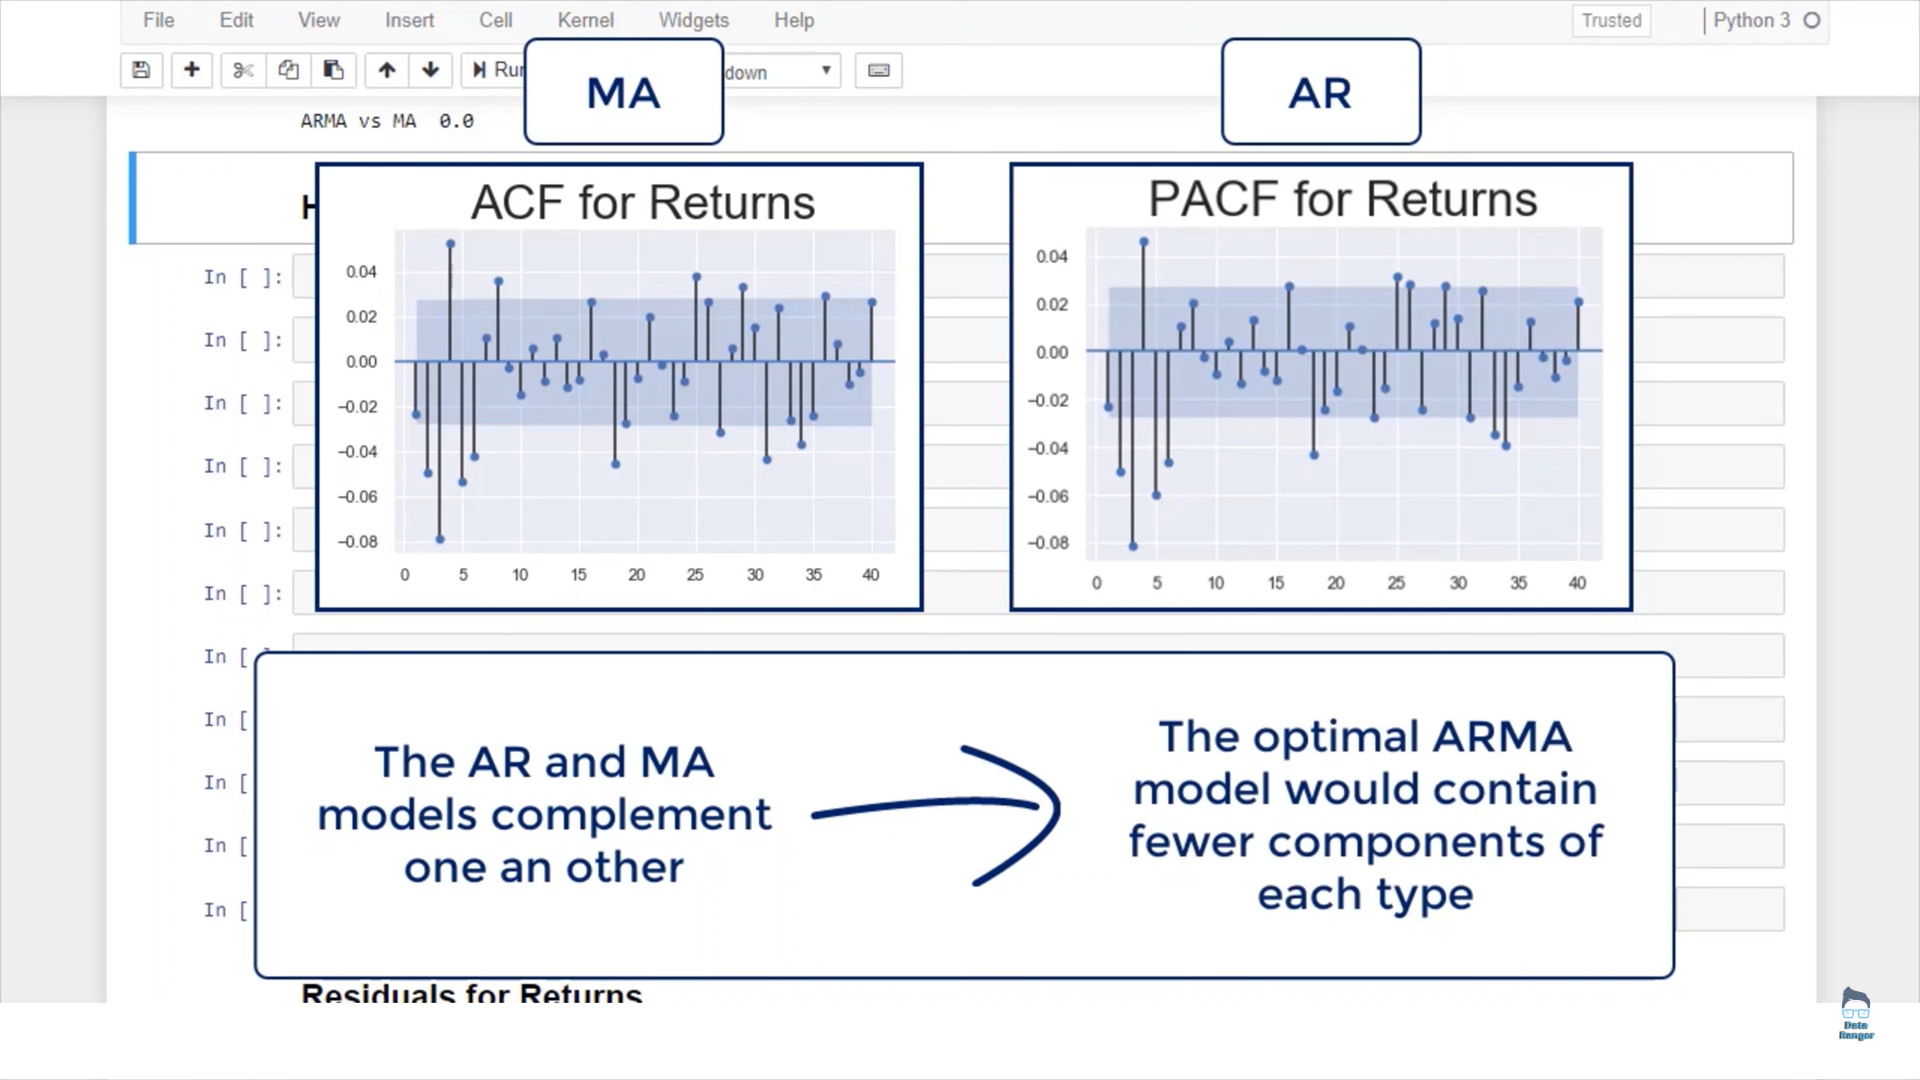

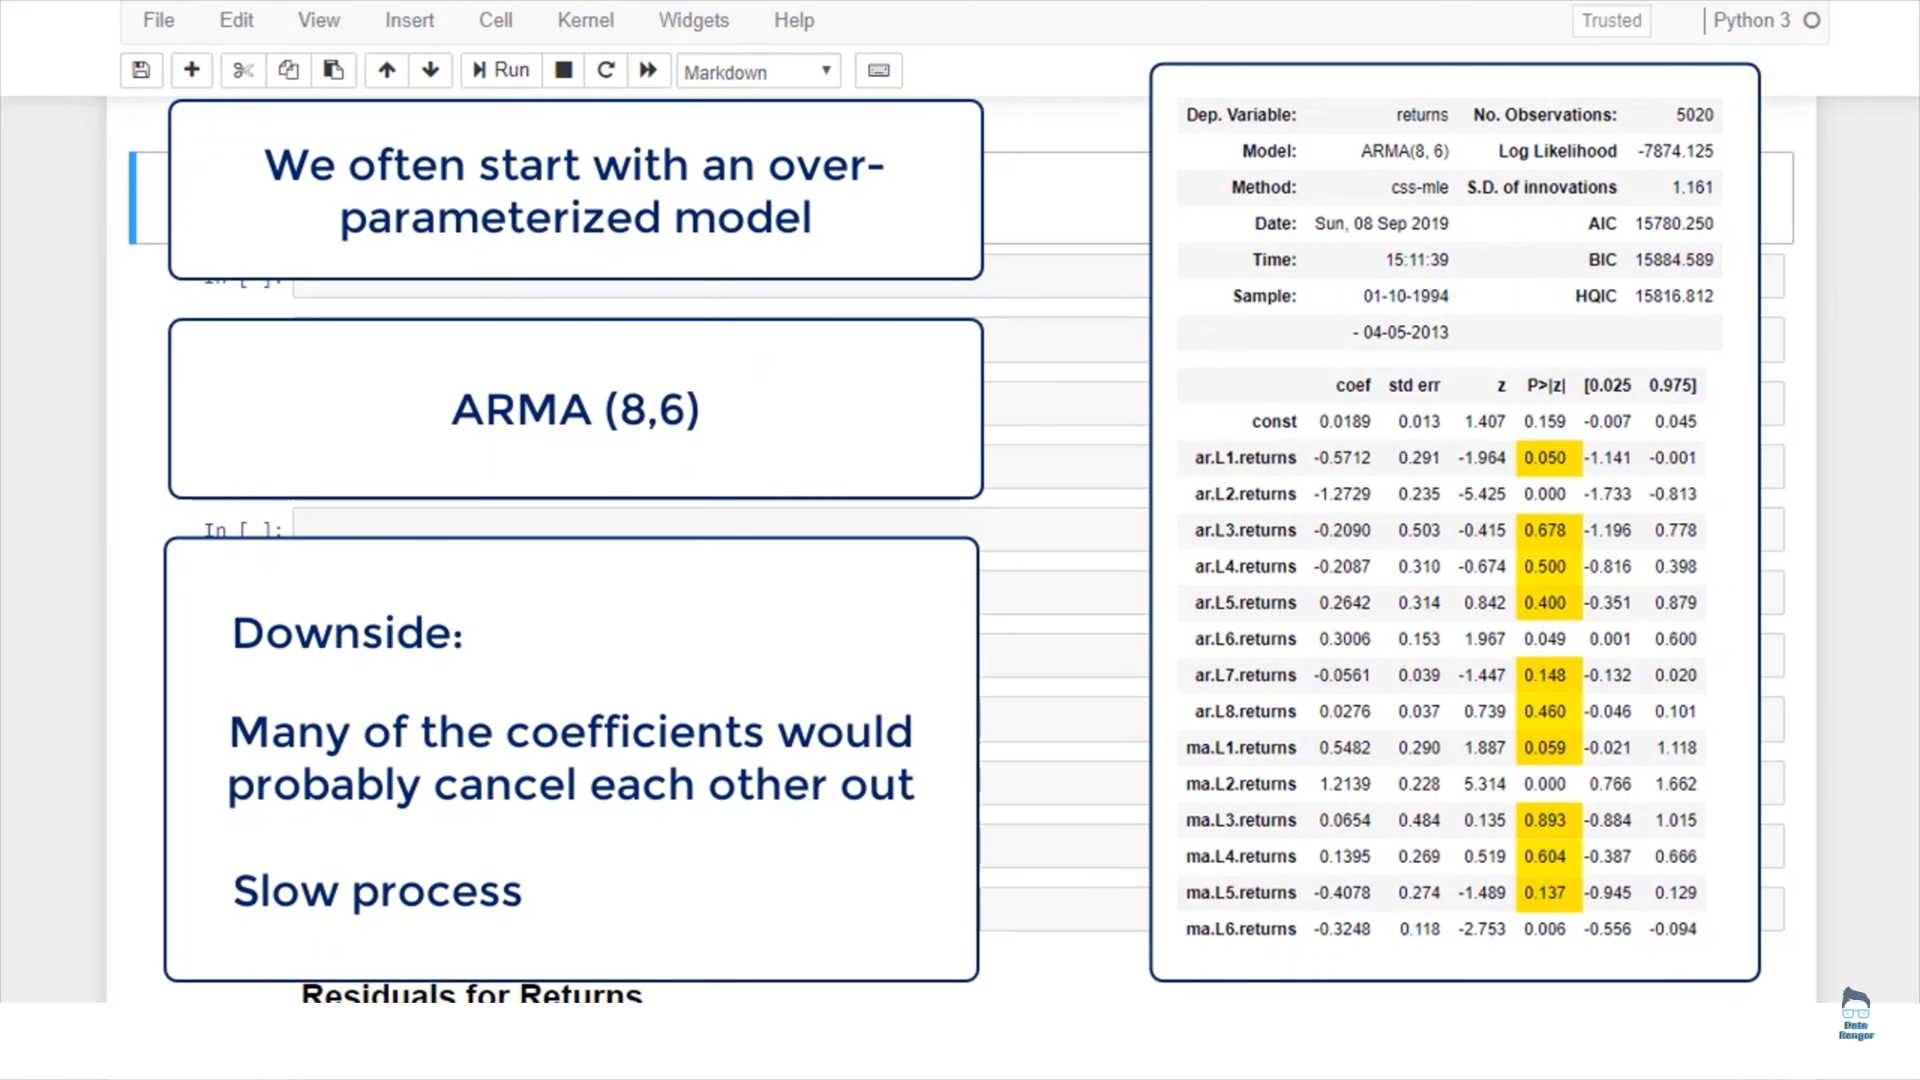

If we assume ARMA(4,3) is half the ARMA(8,6)
starting with a simpler ARMA(3,3) sounds all the more sensible

In [ ]:
model_ret_ar_3_ma_3 = ARIMA(df_comp.returns[1:], order = (3,0,3))

results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
LLR_test(model_ret_ar_1_ma_1, model_ret_ar_3_ma_3, DF = 4)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.755

In [ ]:
results_ret_ar_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -9657.353
Date:                Wed, 28 Jun 2023   AIC                          19330.706
Time:                        17:28:41   BIC                          19384.662
Sample:                    01-10-1994   HQIC                         19349.401
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0351      0.014      2.482      0.013       0.007       0.063
ar.L1          0.7498      2.279      0.329      0.742      -3.717       5.217
ar.L2          0.7977      0.531      1.502      0.133      -0.243       1.838
ar.L3         -0.5680      1.330     -0.427      0.669      -3.175       2.039
ma.L1         -0.8196      2.280     -0.359      0.719      -5.288       3.649
ma.L2         -0.7780      0.384     -2.027      0.043      -1.530      -0.026
ma.L3          0.6142      1.442      0.426      0.670      -2.211       3.440
sigma2         1.2707      0.010    124.344      0.000       1.251       1.291
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             20455.92
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_2_ma_3 = ARIMA(df_comp.returns[1:], order = (2,0,3))

results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()

In [ ]:
results_ret_ar_2_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -9657.751
Date:                Wed, 28 Jun 2023   AIC                          19329.503
Time:                        17:28:58   BIC                          19376.714
Sample:                    01-10-1994   HQIC                         19345.861
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0351      0.014      2.541      0.011       0.008       0.062
ar.L1          1.6413      0.220      7.445      0.000       1.209       2.073
ar.L2         -0.6809      0.149     -4.556      0.000      -0.974      -0.388
ma.L1         -1.7133      0.222     -7.730      0.000      -2.148      -1.279
ma.L2          0.7665      0.168      4.573      0.000       0.438       1.095
ma.L3         -0.0203      0.011     -1.902      0.057      -0.041       0.001
sigma2         1.2710      0.010    123.336      0.000       1.251       1.291
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20582.70
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Returns in an efficient market should be close to 0 anyway, None os the p-values for this model are troublesome

In [ ]:
LLR_test(model_ret_ar_2_ma_3, model_ret_ar_3_ma_3)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.372

In [ ]:
model_ret_ar_3_ma_1 = ARIMA(df_comp.returns[1:], order = (3,0,1))

results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
results_ret_ar_3_ma_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -9657.665
Date:                Wed, 28 Jun 2023   AIC                          19327.330
Time:                        17:29:34   BIC                          19367.797
Sample:                    01-10-1994   HQIC                         19341.351
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0351      0.013      2.683      0.007       0.009       0.061
ar.L1          0.7243      0.078      9.273      0.000       0.571       0.877
ar.L2          0.0131      0.009      1.402      0.161      -0.005       0.031
ar.L3          0.0100      0.010      1.024      0.306      -0.009       0.029
ma.L1         -0.7961      0.077    -10.305      0.000      -0.947      -0.645
sigma2         1.2709      0.010    124.464      0.000       1.251       1.291
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20372.30
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_1_ma_3 = ARIMA(df_comp.returns[1:], order = (1,0,3))

results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
results_ret_ar_1_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -9657.722
Date:                Wed, 28 Jun 2023   AIC                          19327.445
Time:                        17:32:06   BIC                          19367.912
Sample:                    01-10-1994   HQIC                         19341.466
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0351      0.013      2.682      0.007       0.009       0.061
ar.L1          0.7521      0.099      7.570      0.000       0.557       0.947
ma.L1         -0.8236      0.099     -8.293      0.000      -1.018      -0.629
ma.L2          0.0156      0.011      1.478      0.140      -0.005       0.036
ma.L3          0.0082      0.010      0.795      0.426      -0.012       0.028
sigma2         1.2710      0.010    124.521      0.000       1.251       1.291
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20394.03
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_3_ma_2 = ARIMA(df_comp.returns[1:], order = (3,0,2))

results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
results_ret_ar_3_ma_2.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -9657.880
Date:                Wed, 28 Jun 2023   AIC                          19329.760
Time:                        17:32:53   BIC                          19376.971
Sample:                    01-10-1994   HQIC                         19346.118
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0351      0.013      2.718      0.007       0.010       0.060
ar.L1          0.0137      3.468      0.004      0.997      -6.784       6.811
ar.L2          0.4842      2.433      0.199      0.842      -4.284       5.252
ar.L3          0.0098      0.062      0.159      0.874      -0.111       0.131
ma.L1         -0.0853      3.468     -0.025      0.980      -6.883       6.712
ma.L2         -0.5165      2.682     -0.193      0.847      -5.774       4.741
sigma2         1.2710      0.010    122.672      0.000       1.251       1.291
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20514.24
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
LLR_test(model_ret_ar_3_ma_2, model_ret_ar_3_ma_1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.512

In [ ]:
model_ret_ar_1_ma_3 = ARIMA(df_comp.returns[1:], order = (1,0,3))

results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
results_ret_ar_1_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -9657.722
Date:                Wed, 28 Jun 2023   AIC                          19327.445
Time:                        17:33:18   BIC                          19367.912
Sample:                    01-10-1994   HQIC                         19341.466
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0351      0.013      2.682      0.007       0.009       0.061
ar.L1          0.7521      0.099      7.570      0.000       0.557       0.947
ma.L1         -0.8236      0.099     -8.293      0.000      -1.018      -0.629
ma.L2          0.0156      0.011      1.478      0.140      -0.005       0.036
ma.L3          0.0082      0.010      0.795      0.426      -0.012       0.028
sigma2         1.2710      0.010    124.521      0.000       1.251       1.291
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20394.03
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
LLR_test(model_ret_ar_1_ma_3, model_ret_ar_3_ma_1)

0.734

In [ ]:
model_ret_ar_2_ma_2 = ARIMA(df_comp.returns[1:], order = (2,0,2))

results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
results_ret_ar_2_ma_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -9657.828
Date:                Wed, 28 Jun 2023   AIC                          19327.656
Time:                        17:33:47   BIC                          19368.123
Sample:                    01-10-1994   HQIC                         19341.677
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0351      0.013      2.686      0.007       0.009       0.061
ar.L1          0.8445      0.636      1.328      0.184      -0.402       2.091
ar.L2         -0.0844      0.400     -0.211      0.833      -0.868       0.700
ma.L1         -0.9165      0.636     -1.442      0.149      -2.162       0.329
ma.L2          0.1105      0.442      0.250      0.802      -0.755       0.976
sigma2         1.2710      0.010    124.808      0.000       1.251       1.291
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20482.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

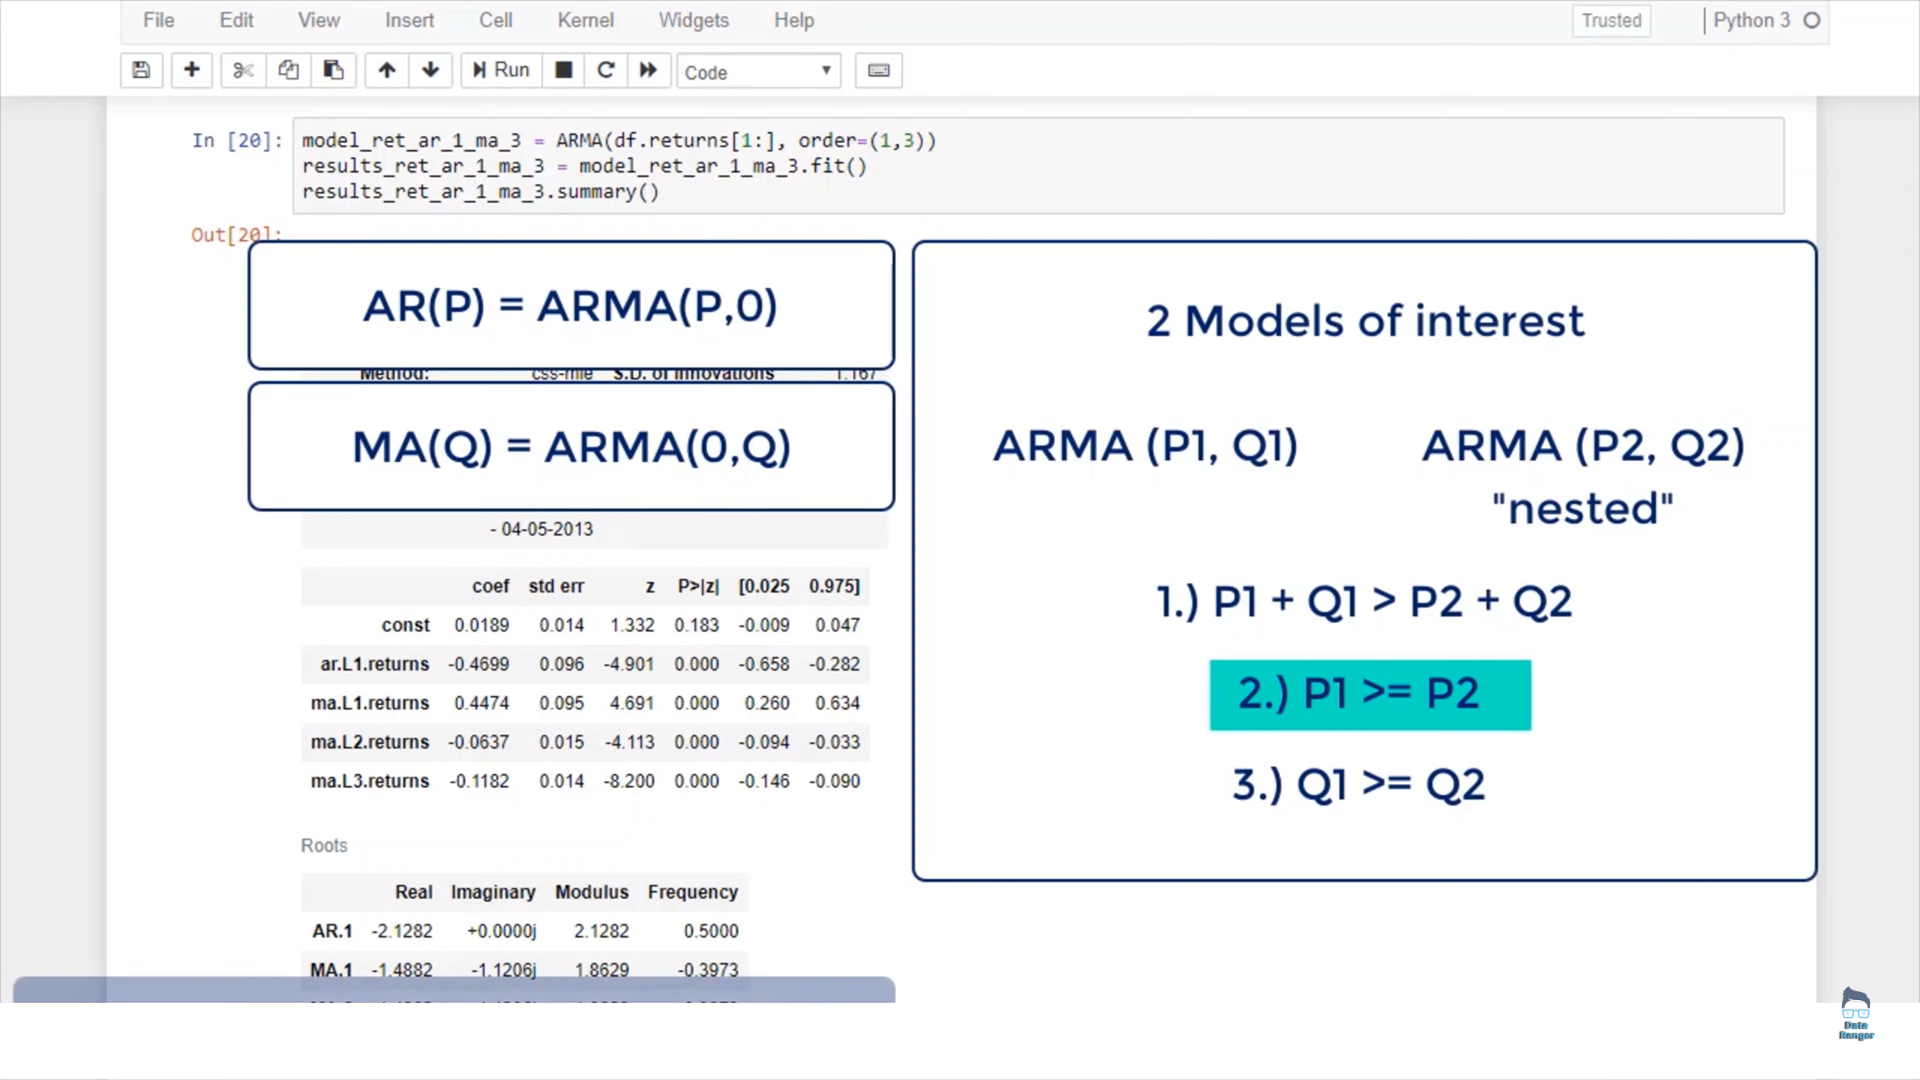

we manually compare the log likelihood test and AICs of both models










Higher LLr, and Lower AIC

In [ ]:
print("\nARMA(3,2): \tLL = ", results_ret_ar_3_ma_2.llf, "\tAIC = ", results_ret_ar_3_ma_2.aic)
print("\nARMA(1,3): \tLL = ", results_ret_ar_1_ma_3.llf, "\tAIC = ", results_ret_ar_1_ma_3.aic)


ARMA(3,2): 	LL =  -9657.879981423297 	AIC =  19329.759962846594

ARMA(1,3): 	LL =  -9657.722475362178 	AIC =  19327.444950724355


Residuals for Returns

In [ ]:
df_comp['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]


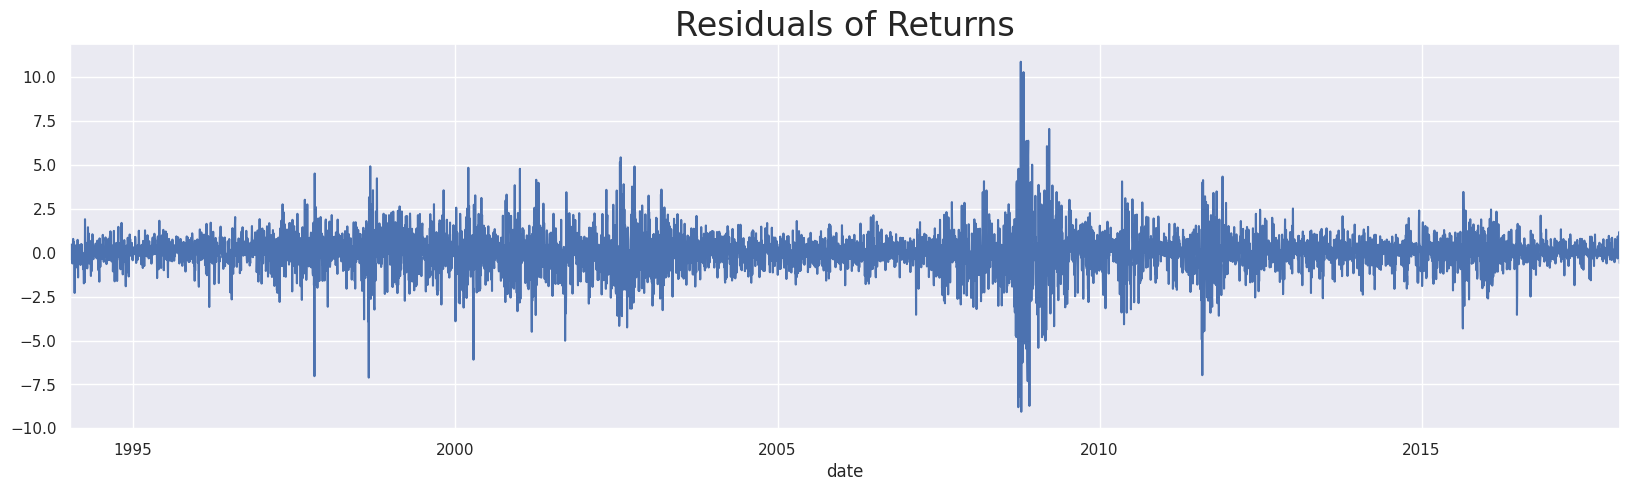

In [ ]:
df_comp.res_ret_ar_3_ma_2.plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 24 )
plt.show()

The volatility in returns might not be fully comprehendable if we use only ARMA models

Text(0.5, 1.0, 'ACF of Residuals for returns')

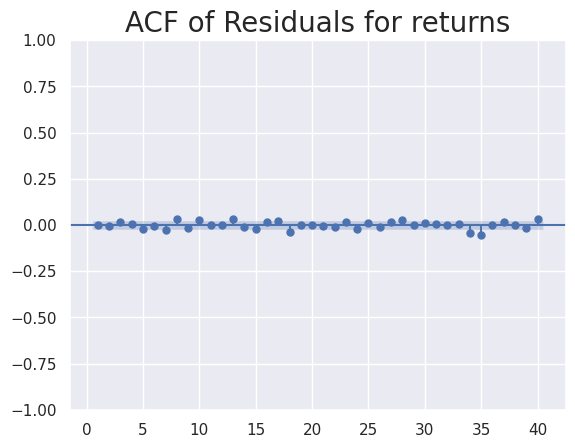

In [ ]:
sgt.plot_acf(df_comp.res_ret_ar_3_ma_2[2:], lags = 40, zero = False)
plt.title("ACF of Residuals for returns", size = 20)

Re-evaluating Model Selection

In [ ]:
model_ret_ar_5_ma_5 = ARIMA(df_comp.returns[1:], order = (5,0,5))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
results_ret_ar_5_ma_5.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -9648.229
Date:                Wed, 28 Jun 2023   AIC                          19320.459
Time:                        18:27:22   BIC                          19401.393
Sample:                    01-10-1994   HQIC                         19348.501
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0351      0.013      2.730      0.006       0.010       0.060
ar.L1          0.1523      0.097      1.569      0.117      -0.038       0.343
ar.L2          0.9143      0.090     10.126      0.000       0.737       1.091
ar.L3         -0.6148      0.127     -4.844      0.000      -0.864      -0.366
ar.L4         -0.5217      0.083     -6.295      0.000      -0.684      -0.359
ar.L5          0.2568      0.080      3.197      0.001       0.099       0.414
ma.L1         -0.2208      0.096     -2.308      0.021      -0.408      -0.033
ma.L2         -0.9478      0.090    -10.588      0.000      -1.123      -0.772
ma.L3          0.6736      0.127      5.315      0.000       0.425       0.922
ma.L4          0.5129      0.083      6.161      0.000       0.350       0.676
ma.L5         -0.3430      0.081     -4.239      0.000      -0.502      -0.184
sigma2         1.2671      0.011    120.346      0.000       1.246       1.288
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             19546.91
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_5_ma_1 = ARIMA(df_comp.returns[1:], order = (5,0,1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
results_ret_ar_5_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -9654.756
Date:                Wed, 28 Jun 2023   AIC                          19325.512
Time:                        18:27:29   BIC                          19379.468
Sample:                    01-10-1994   HQIC                         19344.207
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0351      0.013      2.786      0.005       0.010       0.060
ar.L1          0.4647      0.105      4.412      0.000       0.258       0.671
ar.L2         -0.0049      0.010     -0.504      0.614      -0.024       0.014
ar.L3          0.0089      0.010      0.908      0.364      -0.010       0.028
ar.L4         -0.0095      0.008     -1.224      0.221      -0.025       0.006
ar.L5         -0.0306      0.007     -4.097      0.000      -0.045      -0.016
ma.L1         -0.5366      0.105     -5.106      0.000      -0.743      -0.331
sigma2         1.2698      0.010    123.037      0.000       1.250       1.290
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20083.80
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ret_ar_1_ma_5 = ARIMA(df_comp.returns[1:], order = (1,0,5))
results_ret_ar_1_ma_5 = model_ret_ar_1_ma_5.fit()
results_ret_ar_1_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -9653.817
Date:                Wed, 28 Jun 2023   AIC                          19323.634
Time:                        18:27:38   BIC                          19377.590
Sample:                    01-10-1994   HQIC                         19342.329
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0351      0.013      2.719      0.007       0.010       0.060
ar.L1         -0.7520      0.064    -11.790      0.000      -0.877      -0.627
ma.L1          0.6815      0.064     10.652      0.000       0.556       0.807
ma.L2         -0.0947      0.009    -10.256      0.000      -0.113      -0.077
ma.L3         -0.0389      0.009     -4.351      0.000      -0.056      -0.021
ma.L4         -0.0218      0.008     -2.571      0.010      -0.038      -0.005
ma.L5         -0.0438      0.007     -6.610      0.000      -0.057      -0.031
sigma2         1.2694      0.010    122.340      0.000       1.249       1.290
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             19575.21
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print("\nARMA(5,1): \tLL = ", results_ret_ar_5_ma_1.llf, "\tAIC = ", results_ret_ar_5_ma_1.aic)
print("\nARMA(1,5): \tLL = ", results_ret_ar_1_ma_5.llf, "\tAIC = ", results_ret_ar_1_ma_5.aic)


ARMA(5,1): 	LL =  -9654.755877436837 	AIC =  19325.511754873674

ARMA(1,5): 	LL =  -9653.81706420791 	AIC =  19323.63412841582


In [ ]:
print("\nARMA(3,2): \tLL = ", results_ret_ar_3_ma_2.llf, "\tAIC = ", results_ret_ar_3_ma_2.aic)


ARMA(3,2): 	LL =  -9657.879981423297 	AIC =  19329.759962846594


In [ ]:
print("\nARMA(1,3): \tLL = ", results_ret_ar_1_ma_3.llf, "\tAIC = ", results_ret_ar_1_ma_3.aic)


ARMA(1,3): 	LL =  -9657.722475362178 	AIC =  19327.444950724355


Residuals for the new models

In [ ]:
df_comp['res_ret_ar_1_ma_5'] = results_ret_ar_1_ma_5.resid

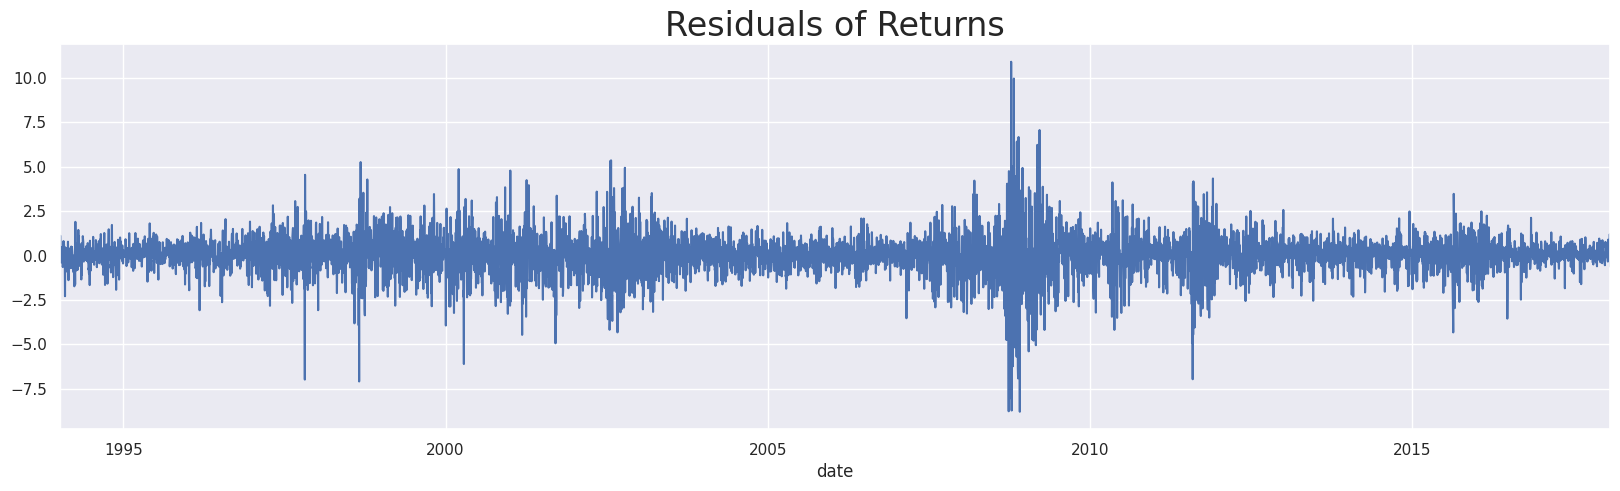

In [ ]:
df_comp.res_ret_ar_1_ma_5.plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 24 )
plt.show()

Text(0.5, 1.0, 'ACF of Residuals for returns')

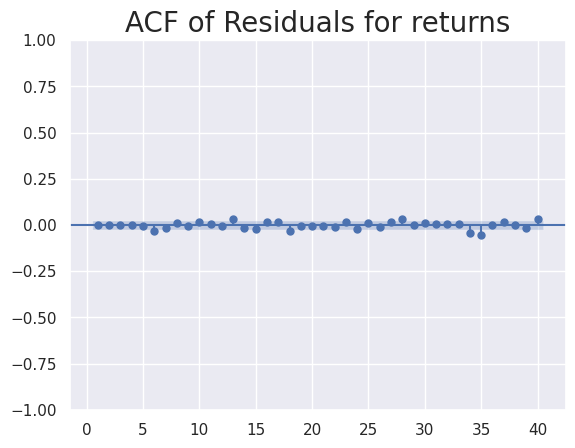

In [ ]:
sgt.plot_acf(df_comp.res_ret_ar_1_ma_5[1:], lags = 40, zero = False)
plt.title("ACF of Residuals for returns", size = 20)

ARMA Models for Prices

<ipython-input-55-c2646464346c>:1: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  sgt.plot_acf(df_comp.market_value, unbiased = True,  lags = 40, zero = False)


Text(0.5, 1.0, 'ACF for prices')

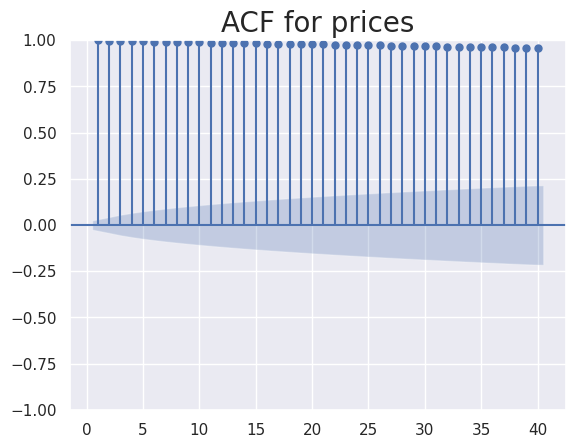

In [ ]:
sgt.plot_acf(df_comp.market_value, unbiased = True,  lags = 40, zero = False)
plt.title("ACF for prices", size = 20)

Text(0.5, 1.0, 'PACF for prices')

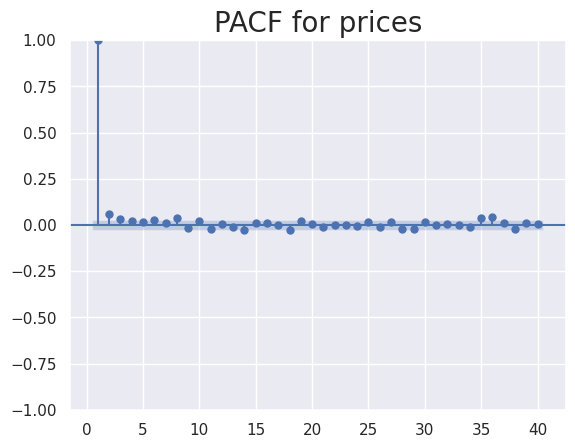

In [ ]:
sgt.plot_pacf(df_comp.market_value,alpha = 0.05, lags = 40, zero = False, method = ('ols'))
plt.title("PACF for prices", size = 20)

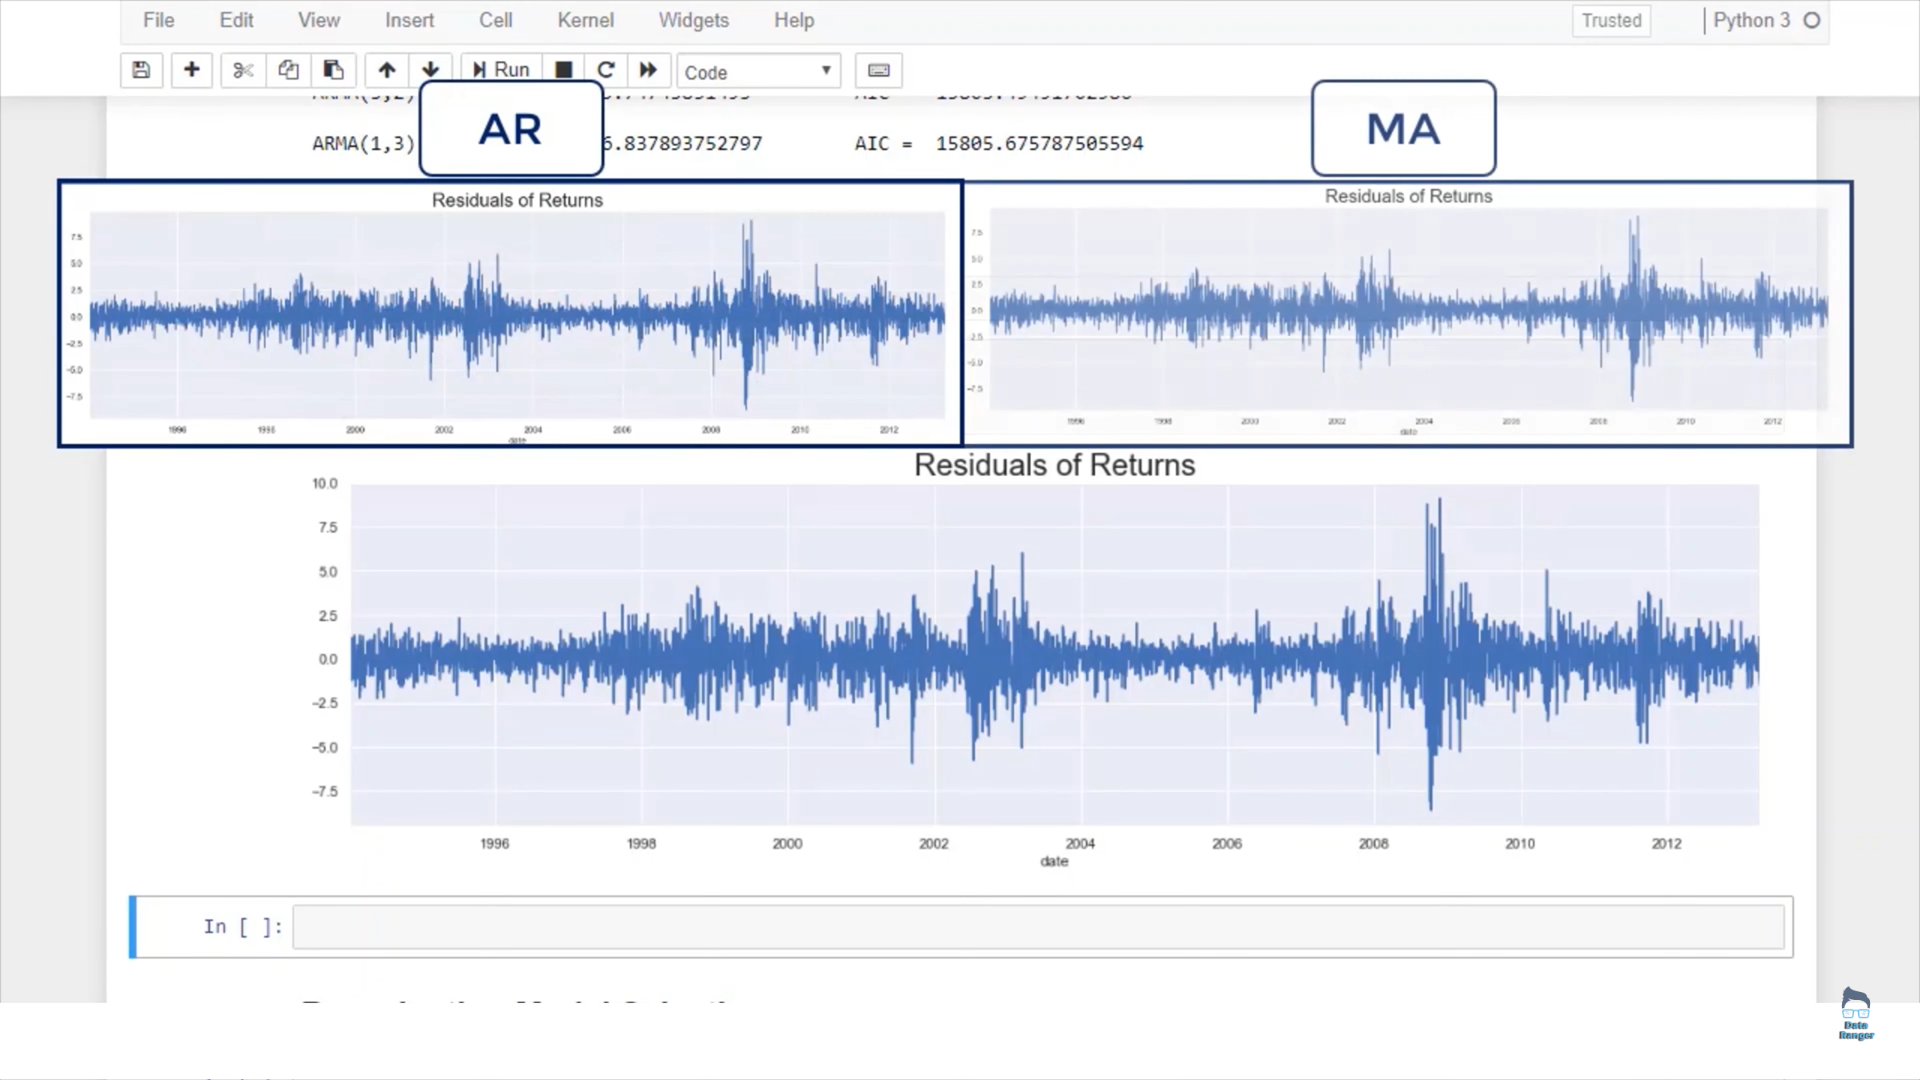

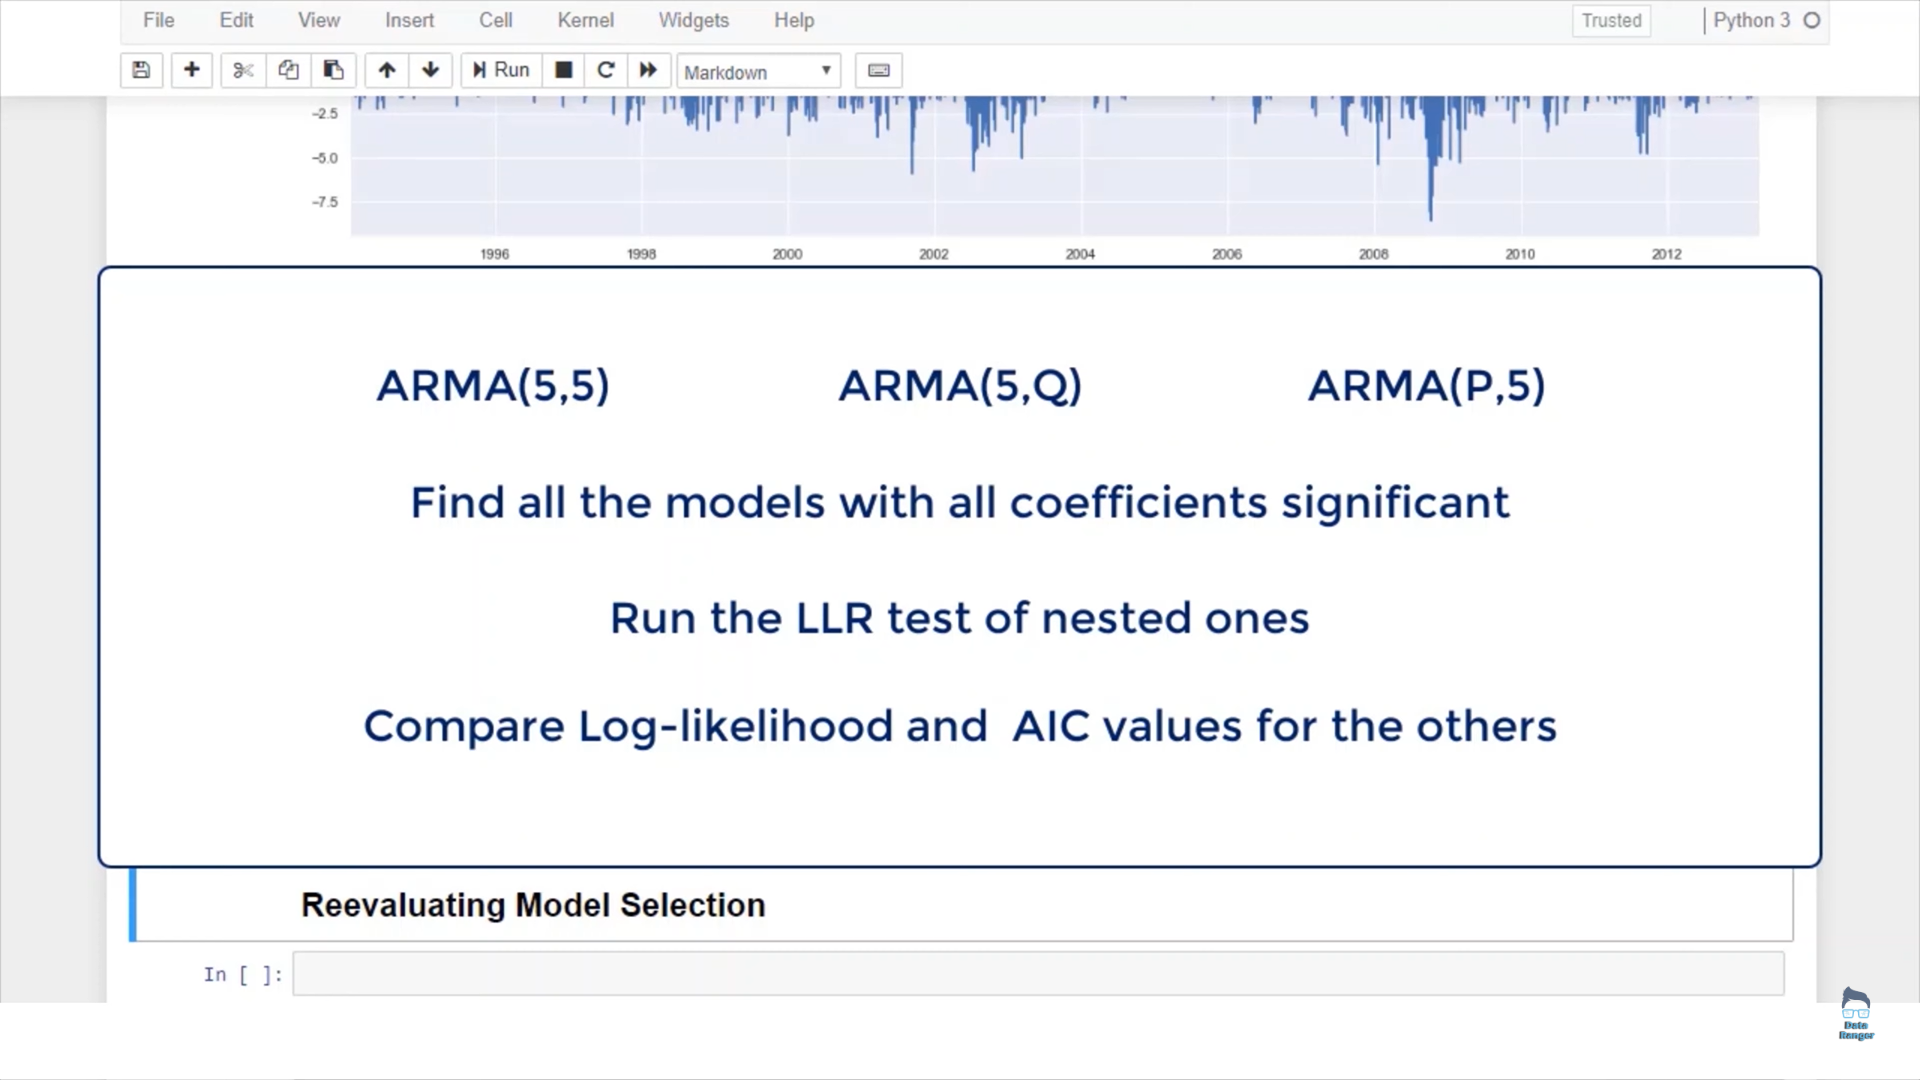

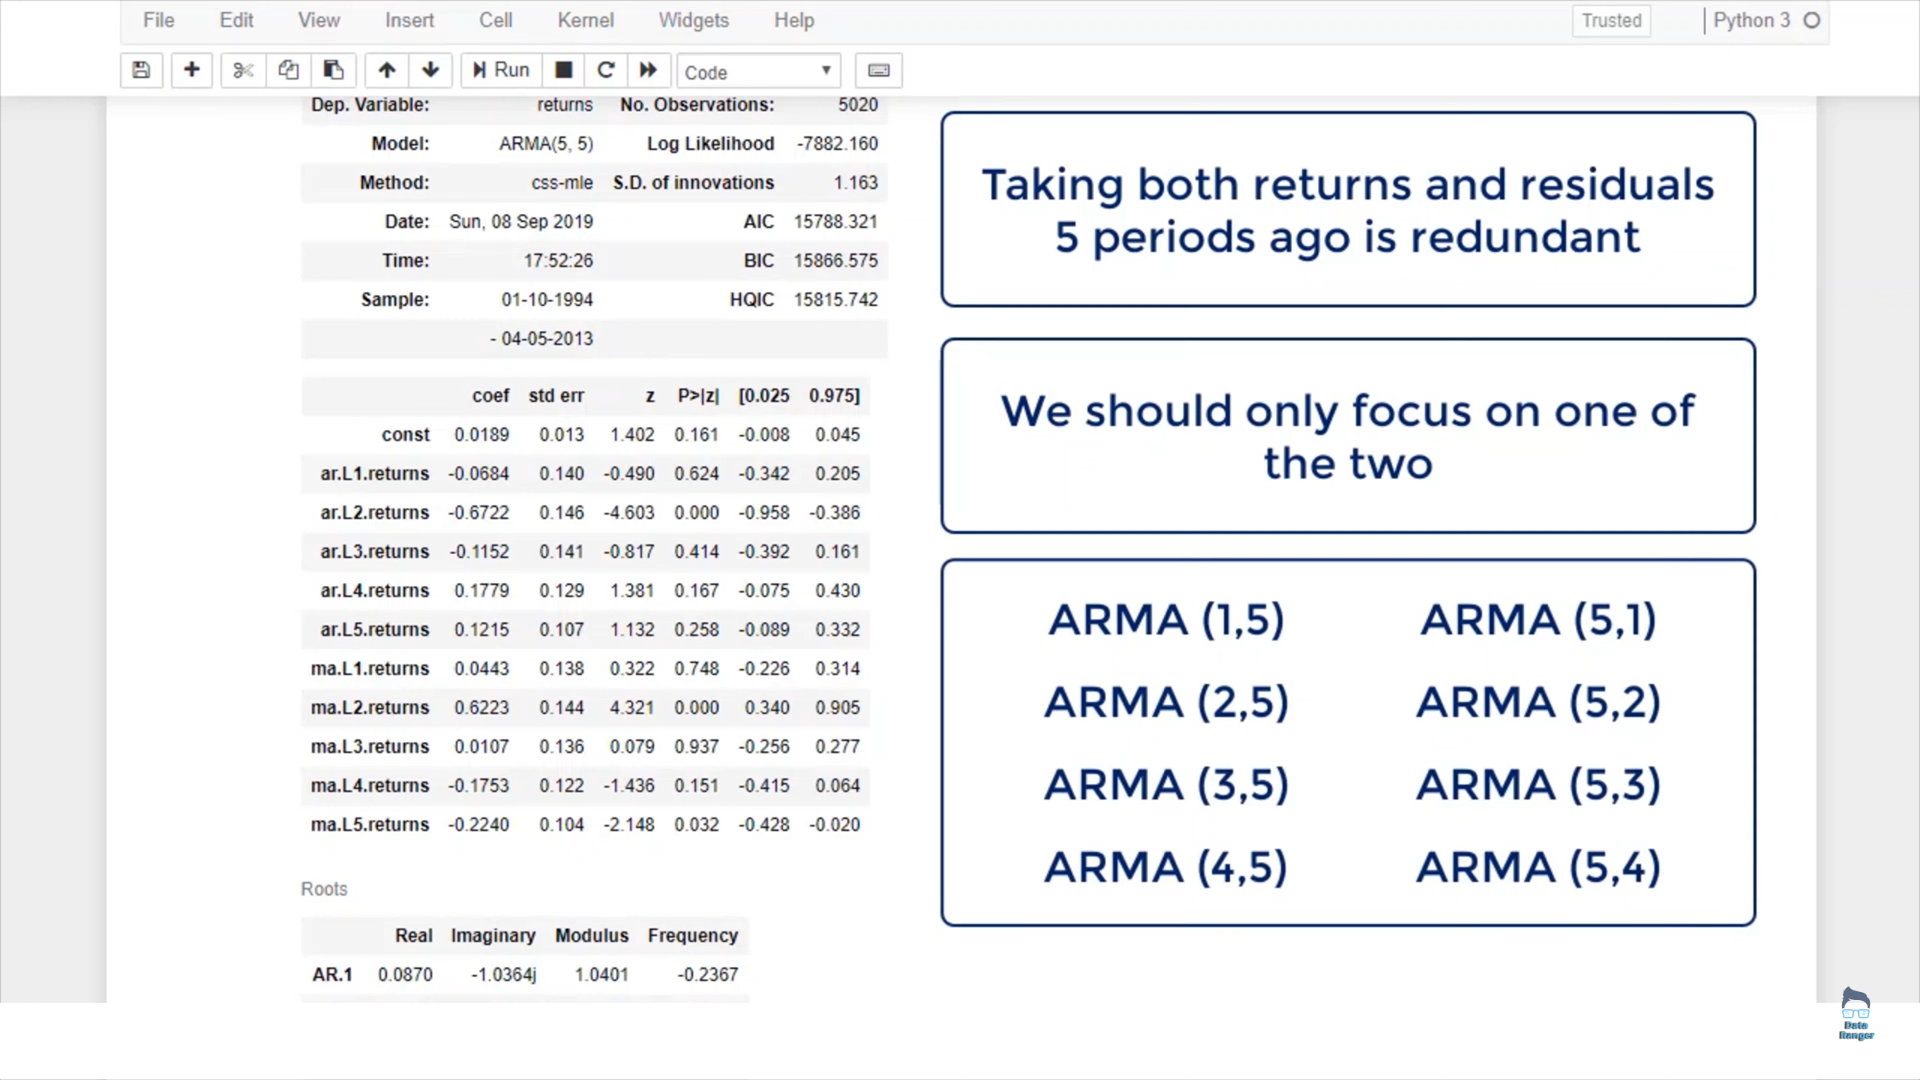